In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# Display basic info
print("Initial dataset shape:", df.shape)

Initial dataset shape: (2126, 14)


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


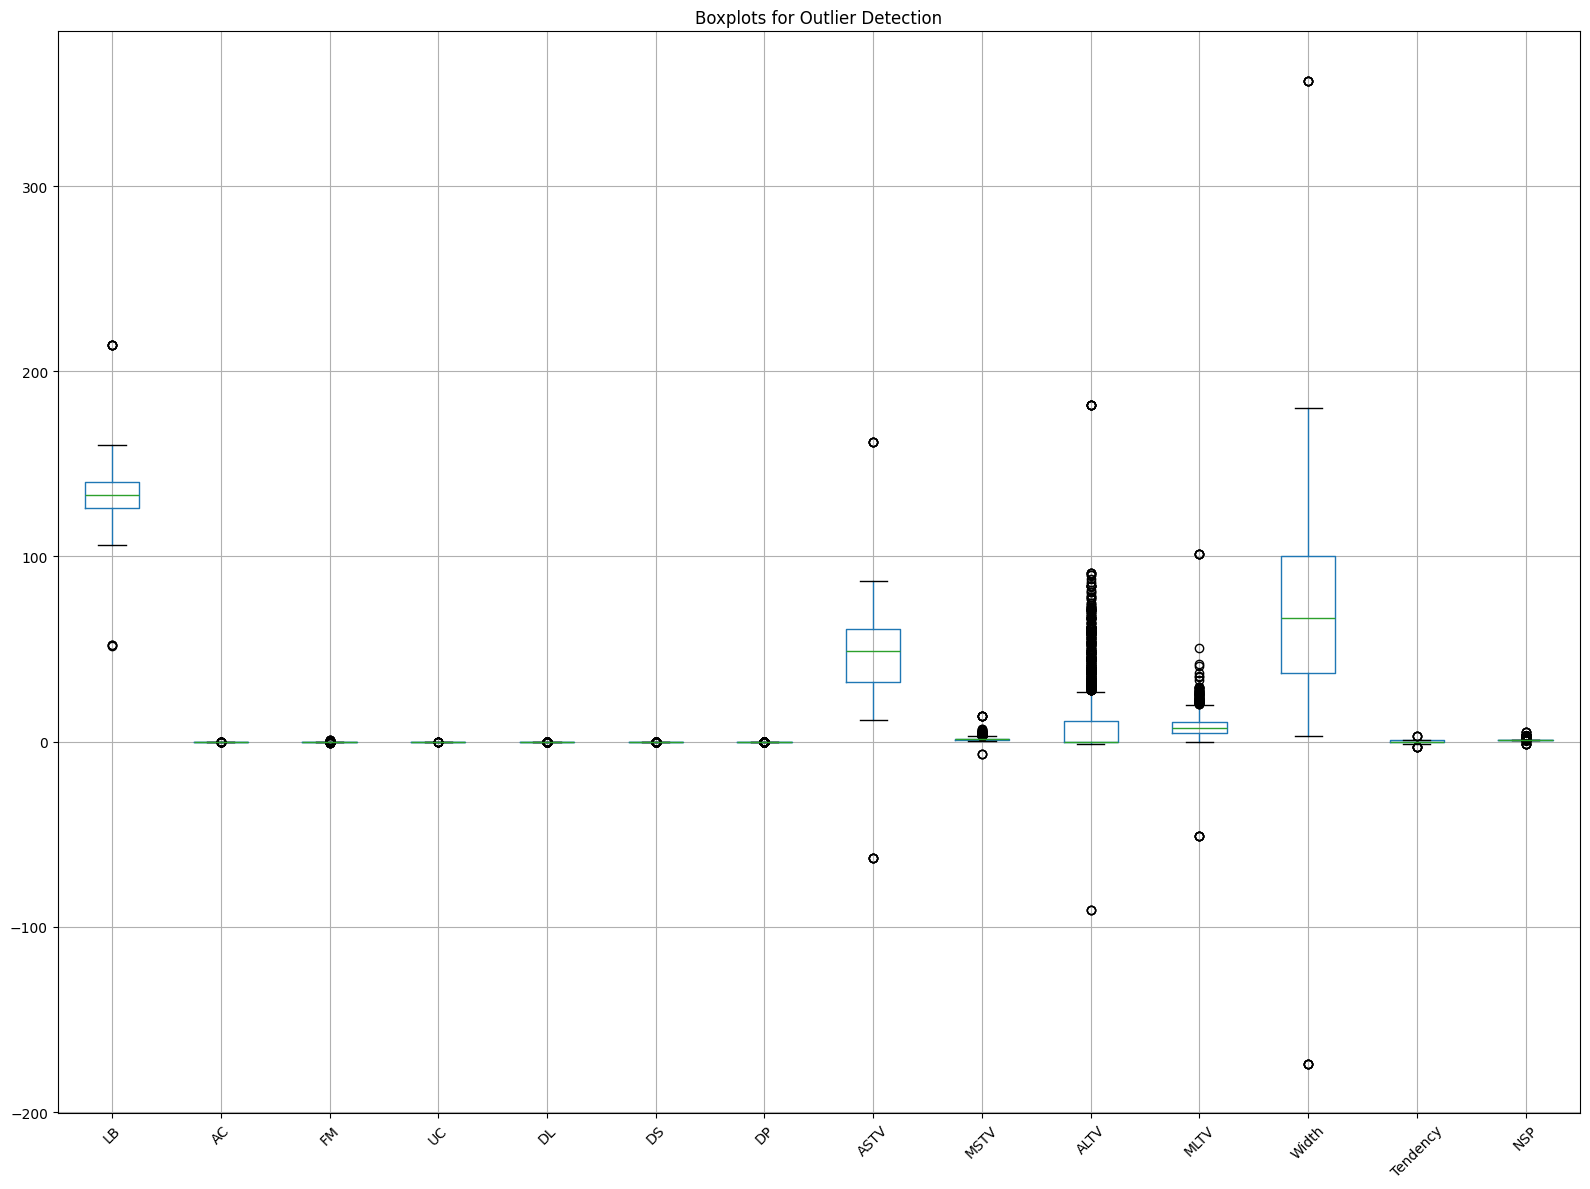

In [10]:
# Detecting outliers using boxplots
plt.figure(figsize=(16, 12))
df.boxplot(rot=90)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Detect and remove outliers using IQR method
def remove_outliers_iqr(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    Q1 = data[numeric_cols].quantile(0.25)
    Q3 = data[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    # Keep rows where all numeric features are within the IQR range
    filtered_df = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) |
                         (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_df

In [12]:
# Apply the IQR outlier removal
df_cleaned = remove_outliers_iqr(df)

In [13]:
print("Dataset shape after outlier removal:", df_cleaned.shape)

Dataset shape after outlier removal: (898, 14)


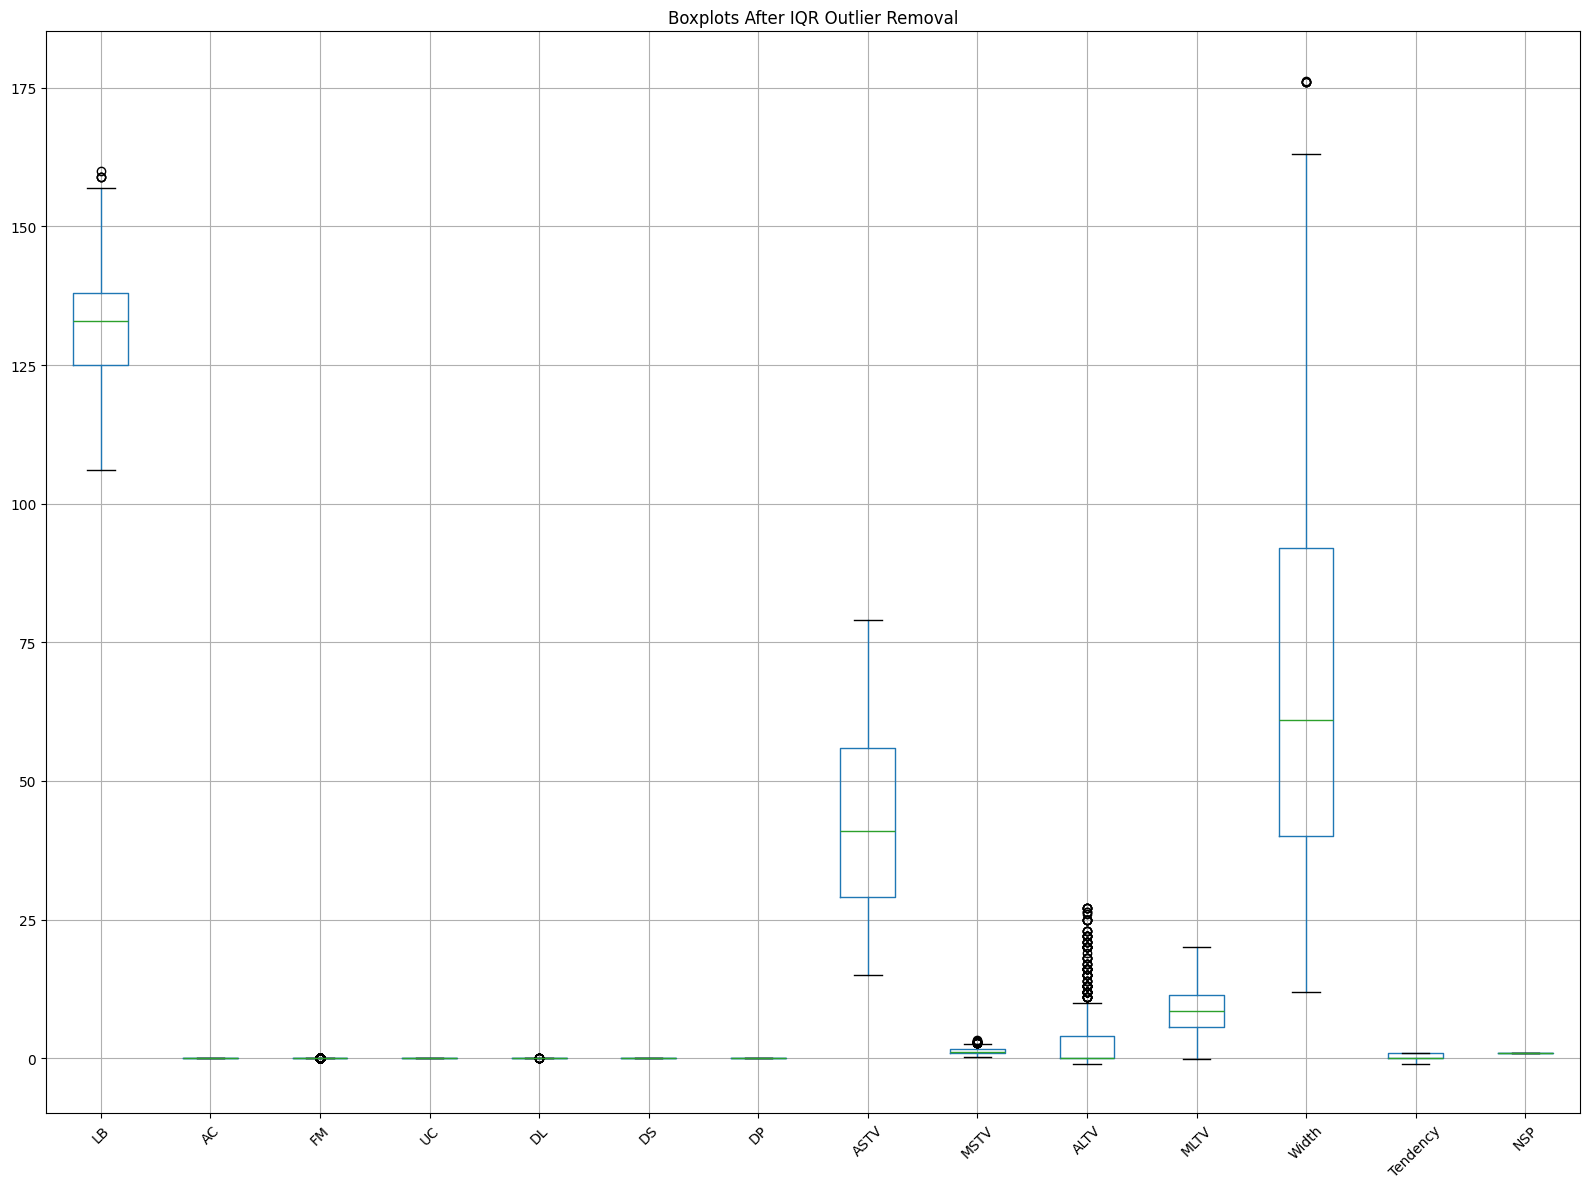

In [14]:
# Visualize boxplots after cleaning
plt.figure(figsize=(16, 12))
df_cleaned.boxplot(rot=90)
plt.title("Boxplots After IQR Outlier Removal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Statistical summary of cleaned dataset
print("Descriptive statistics for each variable:\n")
summary = df_cleaned.describe().T[['mean', 'std']]
summary['median'] = df_cleaned.median()
summary['IQR'] = df_cleaned.quantile(0.75) - df_cleaned.quantile(0.25)

# Rearranging columns
summary = summary[['mean', 'median', 'std', 'IQR']]

#print
print(summary)

Descriptive statistics for each variable:

                mean      median        std        IQR
LB        131.846366  133.000000   9.453055  13.000000
AC          0.004094    0.003358   0.003752   0.006747
FM          0.000604    0.000000   0.001344   0.000303
UC          0.004965    0.005045   0.002706   0.003783
DL          0.001543    0.000000   0.002213   0.003076
DS          0.000000    0.000000   0.000000   0.000000
DP          0.000000    0.000000   0.000000   0.000000
ASTV       42.453496   41.000000  15.055401  27.000000
MSTV        1.273574    1.200000   0.541507   0.700000
ALTV        3.146072    0.000000   6.027415   4.000000
MLTV        8.595633    8.500000   4.498767   5.800000
Width      67.757776   61.000000  32.580868  52.000000
Tendency    0.337906    0.000000   0.588384   1.000000
NSP         1.000000    1.000000   0.000000   0.000000


In [18]:
# Distribution before cleaning
print("NSP distribution in original dataset:")
print(df['NSP'].value_counts())

# Distribution after cleaning
print("\nNSP distribution in cleaned dataset:")
print(df_cleaned['NSP'].value_counts())


NSP distribution in original dataset:
NSP
 1.000000    1546
 2.000000     280
 3.000000     164
-1.000000       5
 5.000000       4
             ... 
 0.993695       1
 1.013864       1
 0.989862       1
 1.004234       1
 1.990464       1
Name: count, Length: 111, dtype: int64

NSP distribution in cleaned dataset:
NSP
1.0    885
Name: count, dtype: int64


In [20]:
# Keep only valid class labels (1, 2, 3)
df = df[df['NSP'].isin([1, 2, 3])]
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.0


In [21]:
print("Unique values in DS:", df_cleaned['DS'].unique())
print("Unique values in DP:", df_cleaned['DP'].unique())


Unique values in DS: [ 0. nan]
Unique values in DP: [ 0. nan]


In [22]:
df_cleaned.drop(columns=['DS', 'DP'], inplace=True)


The variables DS (Decelerations Short) and DP (Decelerations Prolonged) contained only zeros and missing values in the dataset. As they lacked any variation, they were removed from further analysis to maintain data quality and relevance.

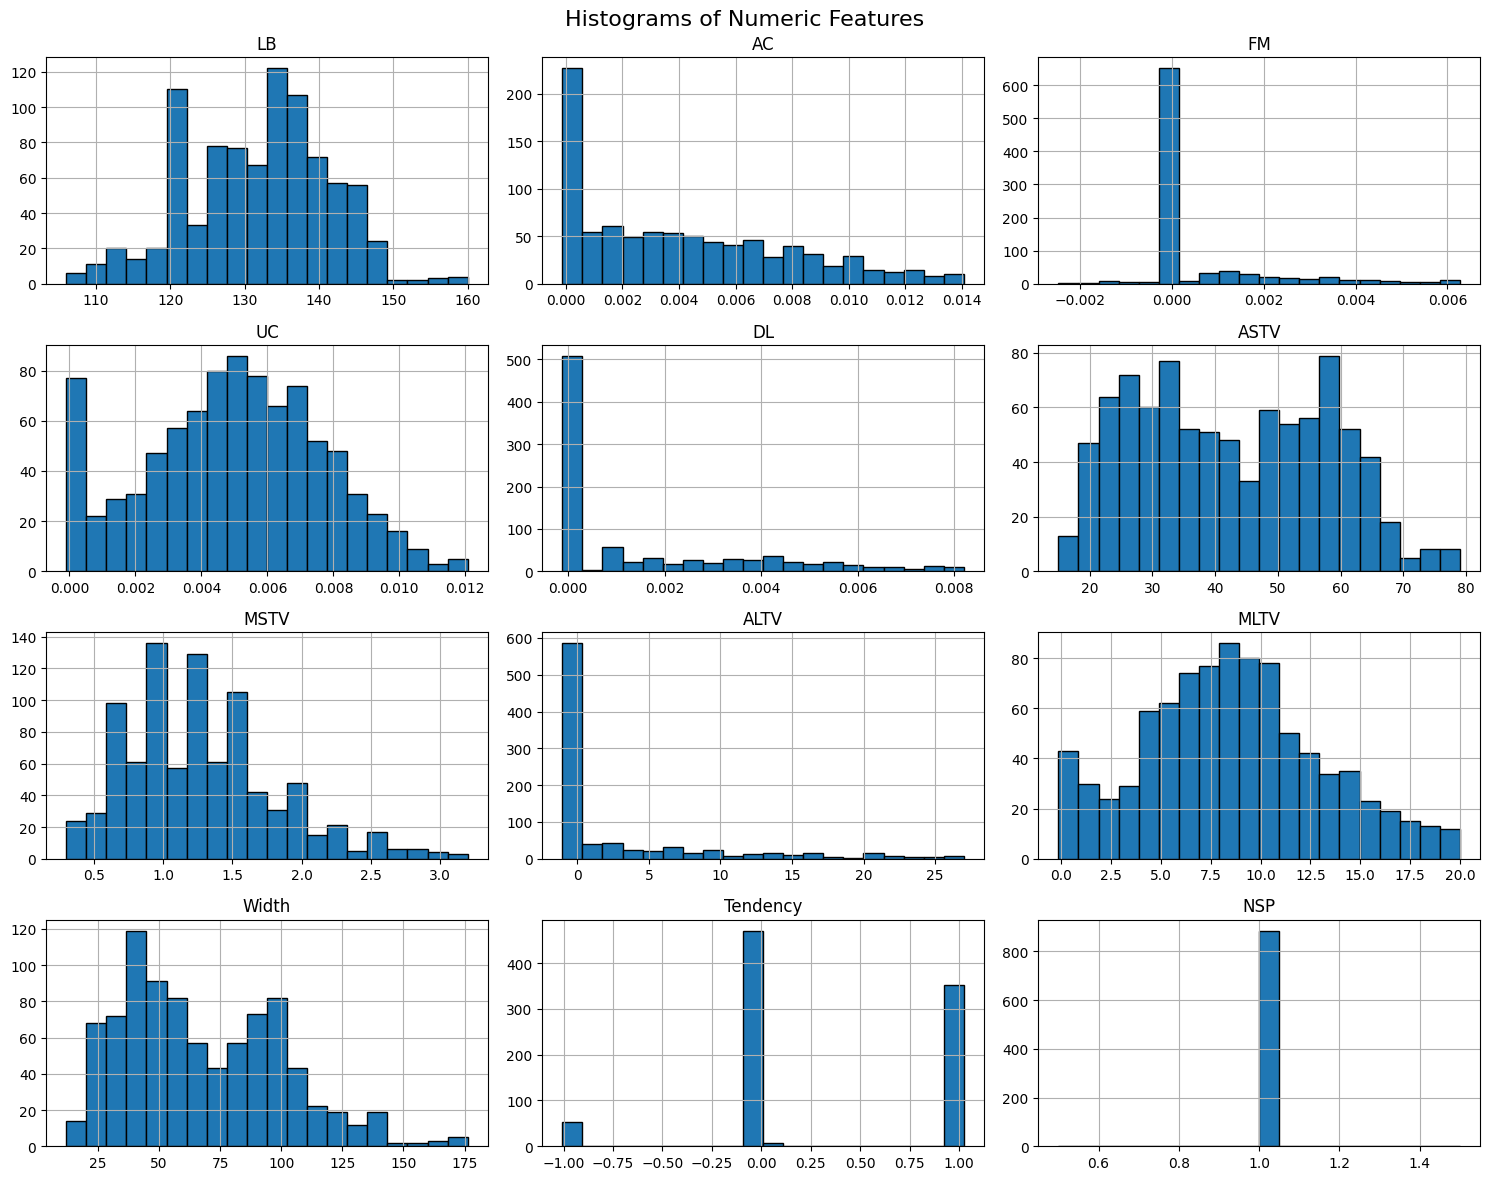

In [23]:
# Plot histograms for all numeric variables
df_cleaned.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

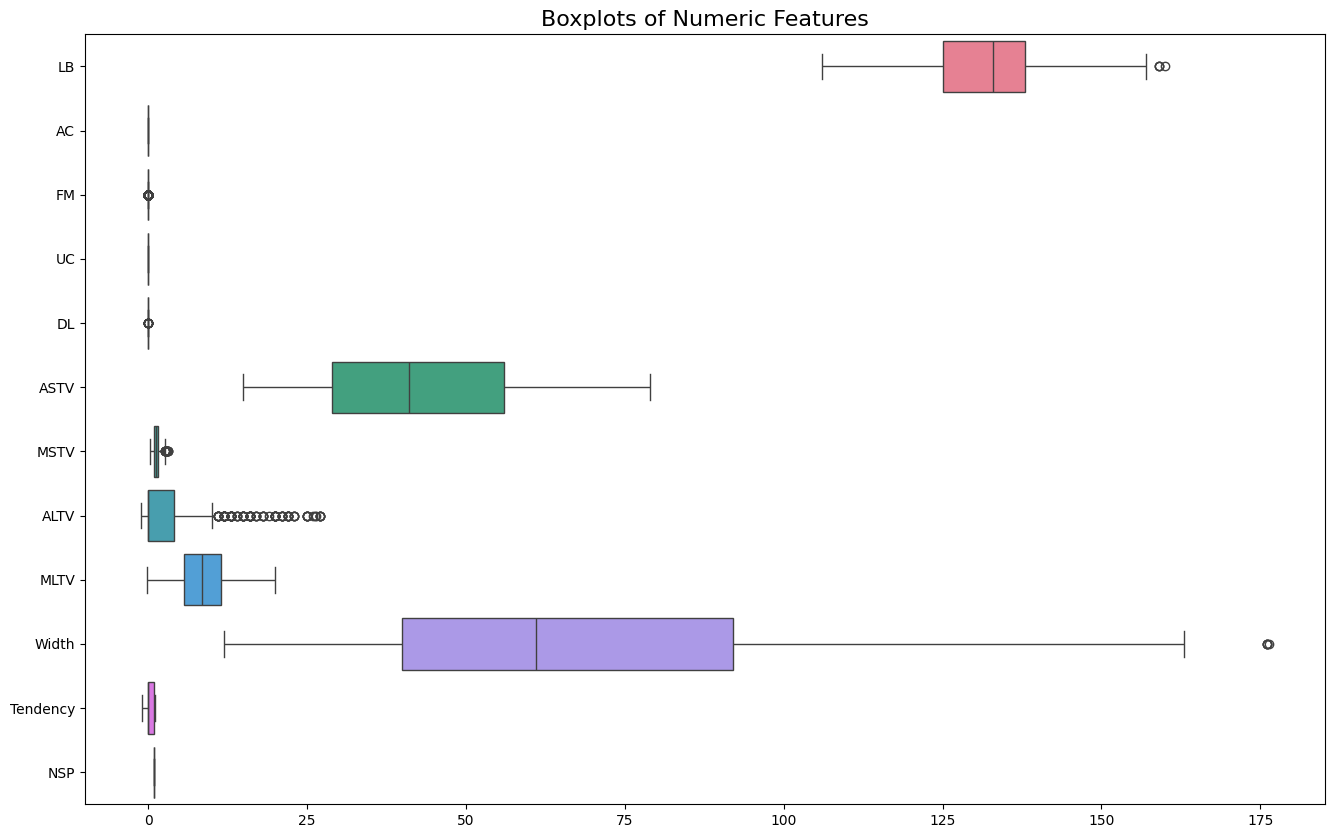

In [24]:
# Plot boxplots for all numeric features
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_cleaned.select_dtypes(include='number'), orient='h')
plt.title('Boxplots of Numeric Features', fontsize=16)
plt.show()

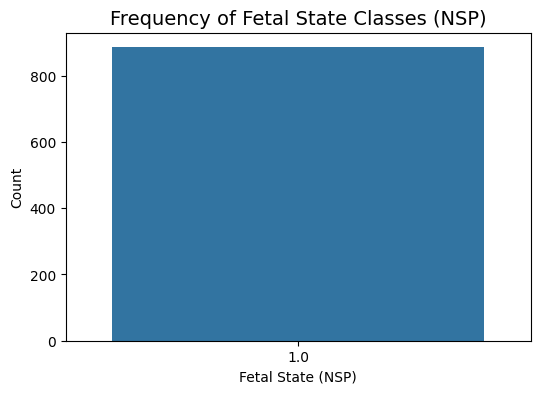

In [25]:
# Count plot (bar chart) for NSP classes
plt.figure(figsize=(6, 4))
sns.countplot(x='NSP', data=df_cleaned)
plt.title('Frequency of Fetal State Classes (NSP)', fontsize=14)
plt.xlabel('Fetal State (NSP)')
plt.ylabel('Count')
plt.show()


In [27]:
# Correlation matrix
corr_matrix = df_cleaned.corr()
corr_matrix

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,0.080275,0.007039,-0.024101,0.020557,0.264214,-0.259457,0.124711,-0.118642,0.011514,0.315552,NaN
AC,0.080275,1.000000,0.079445,0.063122,-0.105664,0.024968,0.155589,-0.328741,-0.407155,0.277007,-0.012625,NaN
FM,0.007039,0.079445,1.000000,-0.205473,0.059132,0.362509,0.113509,-0.086610,-0.109522,0.162650,0.056388,NaN
UC,-0.024101,0.063122,-0.205473,1.000000,0.176501,-0.005684,0.110153,-0.077119,-0.105770,0.018267,-0.078490,NaN
DL,0.020557,-0.105664,0.059132,0.176501,1.000000,0.002368,0.509189,-0.106559,-0.211558,0.541002,0.313009,NaN
ASTV,0.264214,0.024968,0.362509,-0.005684,0.002368,1.000000,-0.347856,0.150778,-0.328000,0.018278,0.079501,NaN
MSTV,-0.259457,0.155589,0.113509,0.110153,0.509189,-0.347856,1.000000,-0.335459,-0.005769,0.545134,0.060776,NaN
ALTV,0.124711,-0.328741,-0.086610,-0.077119,-0.106559,0.150778,-0.335459,1.000000,-0.060899,-0.215642,0.006105,NaN
MLTV,-0.118642,-0.407155,-0.109522,-0.105770,-0.211558,-0.328000,-0.005769,-0.060899,1.000000,-0.032668,-0.025709,NaN
Width,0.011514,0.277007,0.162650,0.018267,0.541002,0.018278,0.545134,-0.215642,-0.032668,1.000000,0.284766,NaN


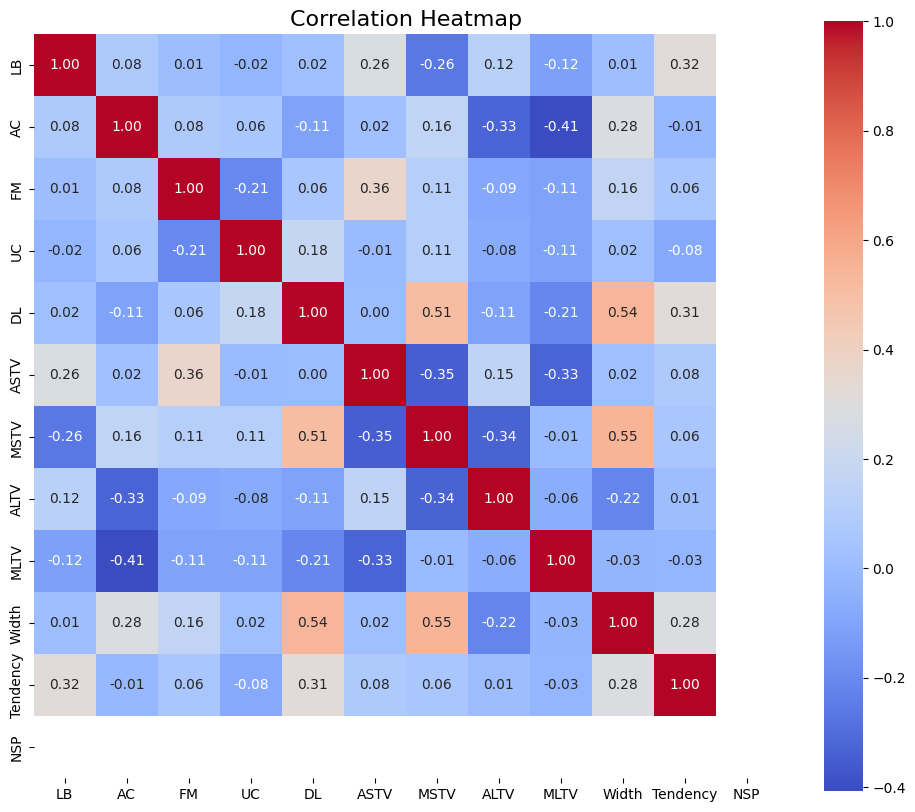

In [28]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

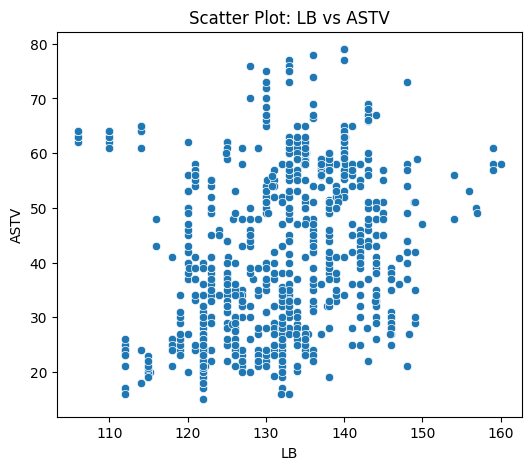

In [29]:
# Example scatter plot: LB vs ASTV
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_cleaned, x='LB', y='ASTV')
plt.title('Scatter Plot: LB vs ASTV')
plt.show()

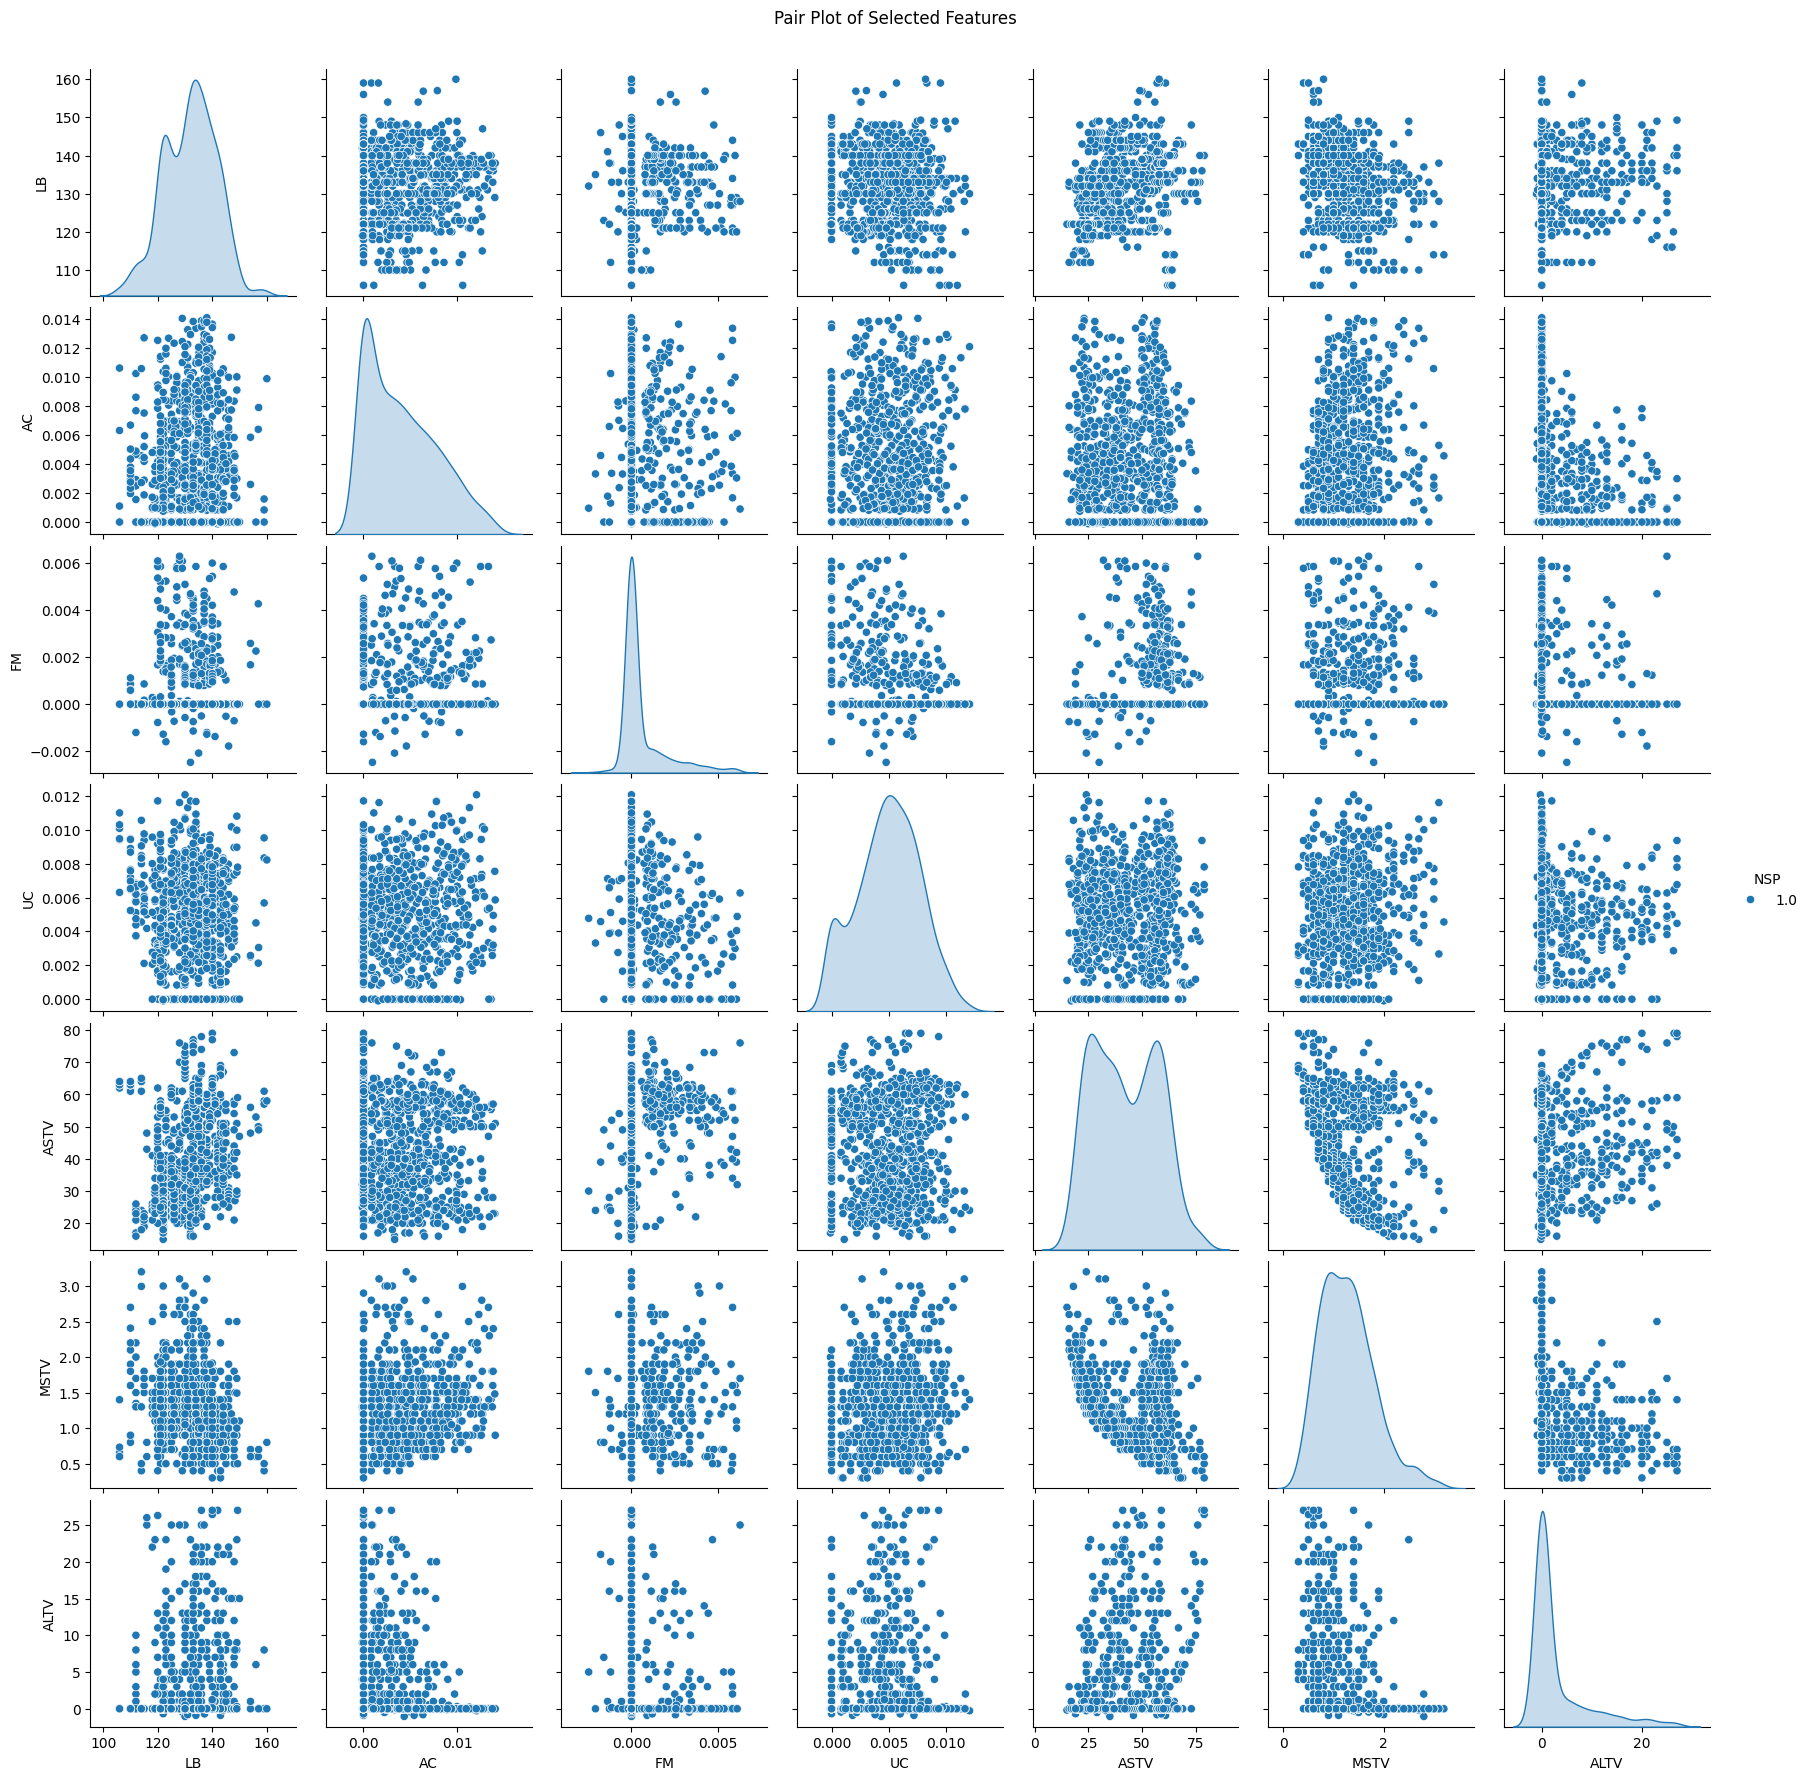

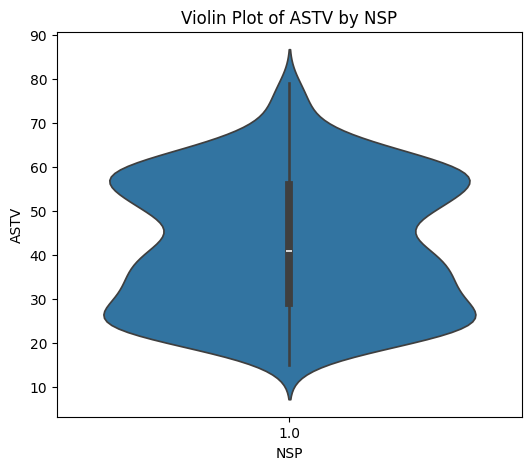

In [30]:
# Pair Plot (for a selected subset to avoid overcrowding)
selected_cols = ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'NSP']
sns.pairplot(df_cleaned[selected_cols], hue='NSP', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Violin Plot: ASTV across NSP (if multiple classes existed)
# Note: This won’t show much variation now since NSP = 1 only
plt.figure(figsize=(6, 5))
sns.violinplot(x='NSP', y='ASTV', data=df_cleaned)
plt.title('Violin Plot of ASTV by NSP')
plt.show()


In [31]:
# Strongest correlations (excluding 1.0 diagonal)
correlation_matrix = df_cleaned.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
strong_corrs = upper.stack().sort_values(ascending=False)

# Display top 5 strongest correlations
print("Top 5 strongest correlations:")
print(strong_corrs.head(5))


Top 5 strongest correlations:
MSTV  Width    0.545134
DL    Width    0.541002
      MSTV     0.509189
AC    MLTV     0.407155
FM    ASTV     0.362509
dtype: float64


MSTV & Width: 0.545134

Moderate positive correlation (0.55)

Suggests that as Mean Short Term Variability (MSTV) increases, Width tends to increase as well

DL & Width: 0.541002

Moderate positive correlation (0.54)

Indicates that as DL increases, Width also tends to increase

DL & MSTV: 0.509189

Moderate positive correlation (0.51)

Shows that DL and Mean Short Term Variability tend to increase together

AC & MLTV: 0.407155

Moderate positive correlation (0.41)

Suggests a relationship between AC and Mean Long Term Variability

FM & ASTV: 0.362509

Weak to moderate positive correlation (0.36)

Indicates some relationship between FM and Abnormal Short Term Variability

Unfortunately, the dataset does not include any timestamp or temporal field, so time-based trend analysis is not applicable here.

If you had a time-based column (like sampling time), we could plot trends of LB, ASTV, or UC over time for individual patients or sessions.

Key Insights:
Missing Values:

Several columns had missing values, notably in LB, AC, DS, DP, and others. You've handled this appropriately by identifying and removing outliers and focusing on valid class labels in the NSP column.

Outlier Detection and Removal:

You used the IQR method to remove outliers, reducing the dataset from 2126 to 898 records. This helps in refining the analysis by ensuring the data is free of extreme values that could distort the results.

Distribution of Variables:

Histograms showed the distribution of numeric features, and boxplots helped detect potential outliers in each column.

The NSP (fetal state) distribution was cleaned, leaving only valid values (1, 2, 3), with class 1 being the most common.

Correlation Analysis:

Strongest correlations were observed between variables like MSTV & Width, DL & Width, and AC & MLTV, indicating relationships that could be explored further in predictive modeling.

Visualizations:

You created various plots (boxplots, histograms, scatter plots, and heatmaps) to visualize the distribution and relationships between the variables. These visualizations are key for understanding the dataset's structure and any potential relationships or trends.

Suggestions for Further Analysis:
Feature Engineering: Given the correlations, you could consider combining certain features or creating new ones to improve any predictive models.

Modeling: With the cleaned dataset and insights into feature relationships, you could try building classification models (like Random Forest or SVM) to predict fetal states (NSP).

Conclusion:
The EDA process has provided valuable insights into the dataset, including handling missing values, detecting and removing outliers, and visualizing the relationships between key variables. The cleaned dataset now focuses on the important columns, and further analysis or modeling can be performed based on these insights.